# Imports

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Dados

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

In [5]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [12]:
print('Tamanho do conjunto de treino: {}'.format(X_train.shape[0]))
print('Tamanho do conjunto de teste: {}'.format(X_test.shape[0]))

Tamanho do conjunto de treino: 455
Tamanho do conjunto de teste: 114


# Modelo

In [17]:
# Instanciando o modelo
modelo = XGBClassifier(n_estimators = 50, max_depth=3, learning_rate=0.01, subsample=0.7)

In [18]:
# Treinando o modelo
modelo.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
# Prevendo os resultados
y_pred = modelo.predict(X_test)

## Avaliação do modelo

In [22]:
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred)

print('Acurácia: {}'.format(acuracia))
print('Precisão: {}'.format(precisao))
print('Recall: {}'.format(recall))
print('ROC AUC: {}'.format(AUC))

Acurácia: 0.9649122807017544
Precisão: 0.9594594594594594
Recall: 0.9861111111111112
ROC AUC: 0.9573412698412699


- Vamos dar uma olhada na matriz de confusão:

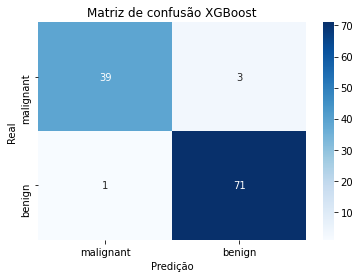

In [25]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de confusão XGBoost')
plt.show()

# Exercícios

> **Exercício 1**: Plote a curva ROC e a curva precision-recall para o modelo. 

> **Exercício 2**: Mude alguns valores dos hiperparâmetros e treine um novo modelo. Compare o novo modelo com o modelo anterior. Qual foi o melhor? Plot a curva ROC para os dois modelos para mostrar a comparação de desempenho. 

> **Exercício 3**: Treine um XGBoost para a base de dados de diabetes que já está salvo na pasta de datasets. Refaça os exercícios 1 e 2 para esse dataset.

# Aula 02: Calculando o f1-score 

Agora que já aprendemos sobre uma nova métrica a F1-score, vamos calculá-la para o modelo que treinamos anteriormente. 

Para isso, não esqueça de carregar essa nova métrica a partir da sklearn.metrics

In [26]:
from sklearn.metrics import f1_score

In [28]:
f1 = f1_score(y_test, y_pred)
print('F1-Score: {}'.format(f1))

F1-Score: 0.9726027397260274


> **Exercício:** Adicione a métrica F1-Score nos exercícios anteriores.